In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing 

In [2]:
from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras import metrics

Using TensorFlow backend.


In [3]:
data = pd.read_csv('filledin_data.csv')

In [4]:
data = data.drop('Unnamed: 0', axis=1)

In [5]:
data.describe(include='all')

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,EXT,...,PERIOD,YEAR,VALTYPE,AVLAND,AVTOT,FULLVAL,LTFRONT,LTDEPTH,BLDFRONT,BLDDEPTH
count,1.070994e+06,1070994,1.070994e+06,1.070994e+06,1.070994e+06,4636,1039249,1070994,1070994,354305,...,1070994,1070994,1070994,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06,1.070994e+06
unique,NaN,1070994,NaN,NaN,NaN,12,863346,200,11,3,...,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2055890117,NaN,NaN,NaN,E,PARKCHESTER PRESERVAT,R4,1,G,...,FINAL,2010/11,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,4148,6020,139879,660721,266970,...,1070994,1070994,1070994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.354975e+05,NaN,3.215427e+00,4.757239e+03,3.647221e+02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.536453e+04,2.281228e+05,8.766547e+05,5.189289e+01,1.077563e+02,3.772559e+01,5.892431e+01
std,3.091695e+05,NaN,1.201197e+00,3.676579e+03,8.532152e+02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.057267e+06,6.877543e+06,1.158230e+07,7.929021e+01,6.987321e+01,4.277037e+01,5.086813e+01
min,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.677492e+05,NaN,3.000000e+00,1.555000e+03,2.300000e+01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.428000e+03,1.857000e+04,3.059522e+05,2.100000e+01,9.900000e+01,2.000000e+01,3.700000e+01
50%,5.354975e+05,NaN,3.000000e+00,4.047000e+03,4.900000e+01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.374000e+04,2.557400e+04,4.470000e+05,3.000000e+01,1.000000e+02,2.200000e+01,4.800000e+01
75%,8.032458e+05,NaN,4.000000e+00,6.898000e+03,1.430000e+02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.985600e+04,4.680000e+04,6.200000e+05,5.000000e+01,1.000000e+02,3.700000e+01,7.000000e+01


In [6]:
# Create 3 sizes

# 1
data["lotarea"] = data["LTFRONT"] * data["LTDEPTH"]

# 2
data["bldarea"] = data["BLDFRONT"] * data["BLDDEPTH"]

data["bldarea"].describe()

data["bldarea"].isnull().sum()

# 3
data["bldvol"] = data["bldarea"] * data["STORIES"]

In [7]:
# Create 9 variables

# 3 sizes: lotarea, bldarea, bldvol
# 3 variables: fullval, avland, avtot
# each of 3 variables normalized by each of 3 sizes
# get 9 variables
data["FULLVAL_r1"] = data["FULLVAL"] / data["lotarea"] 

data["FULLVAL_r2"] = data["FULLVAL"] / data["bldarea"] 

data["FULLVAL_r3"] = data["FULLVAL"] / data["bldvol"] 

data["AVLAND_r4"] = data["AVLAND"] / data["lotarea"] 

data["AVLAND_r5"] = data["AVLAND"] / data["bldarea"] 

data["AVLAND_r6"] = data["AVLAND"] / data["bldvol"] 

data["AVTOT_r7"] = data["AVTOT"] / data["lotarea"] 

data["AVTOT_r8"] = data["AVTOT"] / data["bldarea"] 

data["AVTOT_r9"] = data["AVTOT"] / data["bldvol"] 

data.drop([
 'LOT',
 'EASEMENT',
 'OWNER',
 'EXT',
 'EXLAND',
 'EXTOT',
 'EXCD1',
 'STADDR',
 'EXMPTCL',
 'AVLAND2',
 'AVTOT2',
 'EXLAND2',
 'EXTOT2',
 'EXCD2',
 'PERIOD',
 'YEAR',
 'VALTYPE'],axis=1, inplace=True)
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,bldvol,FULLVAL_r1,FULLVAL_r2,FULLVAL_r3,AVLAND_r4,AVLAND_r5,AVLAND_r6,AVTOT_r7,AVTOT_r8,AVTOT_r9
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,31464.0,40.917782,680.142385,680.142385,8.079350,134.296339,134.296339,18.413002,306.064073,306.064073
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,31464.0,34675.254965,6159.420290,6159.420290,2560.386473,454.805492,454.805492,15603.864734,2771.739130,2771.739130
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,1199628.0,261.796157,261.796157,87.265386,97.551991,97.551991,32.517330,117.808271,117.808271,39.269424
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,93670.0,89.714219,836.980890,418.490445,34.913021,325.717946,162.858973,40.371399,376.641401,188.320700
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,5073.0,669.074647,53676.325646,53676.325646,297.434763,23861.620343,23861.620343,301.083591,24154.346541,24154.346541


In [8]:
# Group: all

data["r1_all"] = data["FULLVAL_r1"] / data["FULLVAL_r1"].mean()

data["r2_all"] = data["FULLVAL_r2"] / data["FULLVAL_r2"].mean()

data["r3_all"] = data["FULLVAL_r3"] / data["FULLVAL_r3"].mean()

data["r4_all"] = data["AVLAND_r4"] / data["AVLAND_r4"].mean()

data["r5_all"] = data["AVLAND_r5"] / data["AVLAND_r5"].mean()

data["r6_all"] = data["AVLAND_r6"] / data["AVLAND_r6"].mean()

data["r7_all"] = data["AVTOT_r7"] / data["AVTOT_r7"].mean()

data["r8_all"] = data["AVTOT_r8"] / data["AVTOT_r8"].mean()

data["r9_all"] = data["AVTOT_r9"] / data["AVTOT_r9"].mean()

data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,AVTOT_r9,r1_all,r2_all,r3_all,r4_all,r5_all,r6_all,r7_all,r8_all,r9_all
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,306.064073,0.192659,1.151763,2.453700,0.774693,3.601373,6.375293,0.705829,4.454781,9.803494
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,2771.739130,163.266129,10.430456,22.220887,245.504066,12.196343,21.590449,598.146078,40.342828,88.781177
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,39.269424,1.232650,0.443330,0.314821,9.353826,2.616014,1.543657,4.515968,1.714706,1.257833
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,188.320700,0.422413,1.417356,1.509757,3.347654,8.734652,7.731214,1.547565,5.482038,6.032073
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,24154.346541,3.150293,90.896308,193.644130,28.519696,639.887854,1132.754804,11.541498,351.567951,773.684393


In [9]:
# r1 group by zip5

# r1 group by zip5
data_zip5 = data.groupby("ZIP")["FULLVAL_r1"].mean()
data_zip5 = pd.DataFrame({'ZIP5':data_zip5.index, 'r1_mean_zip5':data_zip5})
data_zip5.head()

data = data.merge(data_zip5, on =['ZIP'], how = 'left')
data.head()

# Var1
data["r1_byzip5"] = data["FULLVAL_r1"] / data["r1_mean_zip5"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r3_all,r4_all,r5_all,r6_all,r7_all,r8_all,r9_all,ZIP5,r1_mean_zip5,r1_byzip5
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,2.453700,0.774693,3.601373,6.375293,0.705829,4.454781,9.803494,10004,334.121124,0.122464
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,22.220887,245.504066,12.196343,21.590449,598.146078,40.342828,88.781177,10004,334.121124,103.780493
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,0.314821,9.353826,2.616014,1.543657,4.515968,1.714706,1.257833,10004,334.121124,0.783537
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,1.509757,3.347654,8.734652,7.731214,1.547565,5.482038,6.032073,10004,334.121124,0.268508
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,193.644130,28.519696,639.887854,1132.754804,11.541498,351.567951,773.684393,10004,334.121124,2.002491


In [10]:
# r1 group by zip3

data['ZIP'] = data['ZIP'].astype(str)
data["ZIP3"] =  data["ZIP"].str.slice(start=0, stop=3)
data["ZIP3"].head()

# r1 group by zip3
data_zip3 = data.groupby("ZIP3")["FULLVAL_r1"].mean()
data_zip3 = pd.DataFrame({'ZIP3_1':data_zip3.index, 'r1_mean_zip3':data_zip3})
data_zip3.head()

data = data.merge(data_zip3, on =['ZIP3'], how = 'left')
data.head()

# Var2
data["r1_byzip3"] = data["FULLVAL_r1"] / data["r1_mean_zip3"]

In [11]:
# r1 group by taxclass

data_taxclass = data.groupby("TAXCLASS")["FULLVAL_r1"].mean()
data_taxclass = pd.DataFrame({'TAXCLASS_1':data_taxclass.index, 'r1_mean_taxclass':data_taxclass})

data = data.merge(data_taxclass, on =['TAXCLASS'], how = 'left')
data.head()

# Var3
data["r1_bytaxclass"] = data["FULLVAL_r1"] / data["r1_mean_taxclass"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,ZIP5,r1_mean_zip5,r1_byzip5,ZIP3,ZIP3_1,r1_mean_zip3,r1_byzip3,TAXCLASS_1,r1_mean_taxclass,r1_bytaxclass
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,10004,334.121124,0.122464,100,100,380.257903,0.107605,4,235.501631,0.173747
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,10004,334.121124,103.780493,100,100,380.257903,91.188782,4,235.501631,147.239978
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,10004,334.121124,0.783537,100,100,380.257903,0.688470,4,235.501631,1.111653
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,10004,334.121124,0.268508,100,100,380.257903,0.235930,4,235.501631,0.380949
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,10004,334.121124,2.002491,100,100,380.257903,1.759529,4,235.501631,2.841062


In [12]:
# r1 group by borough

# r1 group by B
data_b = data.groupby("B")["FULLVAL_r1"].mean()
data_b = pd.DataFrame({'B_1':data_b.index, 'r1_mean_b':data_b})
data_b.head()

data = data.merge(data_b, on =['B'], how = 'left')
data.head()

# Var4
data["r1_byb"] = data["FULLVAL_r1"] / data["r1_mean_b"]

In [13]:
# r2 group by zip5

data_zip5_2 = data.groupby("ZIP")["FULLVAL_r2"].mean()
data_zip5_2 = pd.DataFrame({'ZIP5':data_zip5_2.index, 'r2_mean_zip5_2':data_zip5_2})

data = data.merge(data_zip5_2, on =['ZIP'], how = 'left')
data.head()

# Var5
data["r2_byzip5"] = data["FULLVAL_r2"] / data["r2_mean_zip5_2"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r1_byzip3,TAXCLASS_1,r1_mean_taxclass,r1_bytaxclass,B_1,r1_mean_b,r1_byb,ZIP5_y,r2_mean_zip5_2,r2_byzip5
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,0.107605,4,235.501631,0.173747,1,374.473793,0.109267,10004,429.250521,1.584488
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,91.188782,4,235.501631,147.239978,1,374.473793,92.597281,10004,429.250521,14.349244
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,0.688470,4,235.501631,1.111653,1,374.473793,0.699104,10004,429.250521,0.609891
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,0.235930,4,235.501631,0.380949,1,374.473793,0.239574,10004,429.250521,1.949866
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,1.759529,4,235.501631,2.841062,1,374.473793,1.786706,10004,429.250521,125.046617


In [14]:
# r2 group by zip3

data_zip3_2 = data.groupby("ZIP3")["FULLVAL_r2"].mean()
data_zip3_2 = pd.DataFrame({'ZIP3_1':data_zip3_2.index, 'r2_mean_zip3_2':data_zip3_2})
data.head()

data = data.merge(data_zip3_2, on =['ZIP3'], how = 'left')

# Var6
data["r2_byzip3"] = data["FULLVAL_r2"] / data["r2_mean_zip3_2"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r1_bytaxclass,B_1,r1_mean_b,r1_byb,ZIP5_y,r2_mean_zip5_2,r2_byzip5,ZIP3_1_y,r2_mean_zip3_2,r2_byzip3
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,0.173747,1,374.473793,0.109267,10004,429.250521,1.584488,100,592.954466,1.147040
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,147.239978,1,374.473793,92.597281,10004,429.250521,14.349244,100,592.954466,10.387678
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,1.111653,1,374.473793,0.699104,10004,429.250521,0.609891,100,592.954466,0.441511
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,0.380949,1,374.473793,0.239574,10004,429.250521,1.949866,100,592.954466,1.411543
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,2.841062,1,374.473793,1.786706,10004,429.250521,125.046617,100,592.954466,90.523520


In [15]:
# r2 group by taxclass

data_taxclass_2 = data.groupby("TAXCLASS")["FULLVAL_r2"].mean()
data_taxclass_2 = pd.DataFrame({'TAXCLASS_1':data_taxclass_2.index, 'r2_mean_taxclass_2':data_taxclass_2})

data = data.merge(data_taxclass_2, on =['TAXCLASS'], how = 'left')

data["r2_bytaxclass"] = data["FULLVAL_r2"] / data["r2_mean_taxclass_2"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r1_byb,ZIP5_y,r2_mean_zip5_2,r2_byzip5,ZIP3_1_y,r2_mean_zip3_2,r2_byzip3,TAXCLASS_1_y,r2_mean_taxclass_2,r2_bytaxclass
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,0.109267,10004,429.250521,1.584488,100,592.954466,1.147040,4,712.809452,0.954171
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,92.597281,10004,429.250521,14.349244,100,592.954466,10.387678,4,712.809452,8.641047
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,0.699104,10004,429.250521,0.609891,100,592.954466,0.441511,4,712.809452,0.367274
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,0.239574,10004,429.250521,1.949866,100,592.954466,1.411543,4,712.809452,1.174200
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,1.786706,10004,429.250521,125.046617,100,592.954466,90.523520,4,712.809452,75.302489


In [16]:
# r2 group by B

data_b_2 = data.groupby("B")["FULLVAL_r2"].mean()
data_b_2 = pd.DataFrame({'B_1':data_b_2.index, 'r2_mean_b_2':data_b_2})

data = data.merge(data_b_2, on =['B'], how = 'left')

# Var8
data["r2_b"] = data["FULLVAL_r2"] / data["r2_mean_b_2"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r2_byzip5,ZIP3_1_y,r2_mean_zip3_2,r2_byzip3,TAXCLASS_1_y,r2_mean_taxclass_2,r2_bytaxclass,B_1_y,r2_mean_b_2,r2_b
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,1.584488,100,592.954466,1.147040,4,712.809452,0.954171,1,563.245639,1.207541
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,14.349244,100,592.954466,10.387678,4,712.809452,8.641047,1,563.245639,10.935585
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,0.609891,100,592.954466,0.441511,4,712.809452,0.367274,1,563.245639,0.464799
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,1.949866,100,592.954466,1.411543,4,712.809452,1.174200,1,563.245639,1.485996
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,125.046617,100,592.954466,90.523520,4,712.809452,75.302489,1,563.245639,95.298253


In [17]:
# r3 group by zip5

data_zip5_3 = data.groupby("ZIP")["FULLVAL_r3"].mean()
data_zip5_3 = pd.DataFrame({'ZIP5':data_zip5_3.index, 'r3_mean_zip5_3':data_zip5_3})

data = data.merge(data_zip5_3, on =['ZIP'], how = 'left')

# Var9
data["r3_byzip5"] = data["FULLVAL_r3"] / data["r3_mean_zip5_3"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r2_byzip3,TAXCLASS_1_y,r2_mean_taxclass_2,r2_bytaxclass,B_1_y,r2_mean_b_2,r2_b,ZIP5,r3_mean_zip5_3,r3_byzip5
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,1.147040,4,712.809452,0.954171,1,563.245639,1.207541,10004,149.443064,4.551181
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,10.387678,4,712.809452,8.641047,1,563.245639,10.935585,10004,149.443064,41.215833
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,0.441511,4,712.809452,0.367274,1,563.245639,0.464799,10004,149.443064,0.583937
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,1.411543,4,712.809452,1.174200,1,563.245639,1.485996,10004,149.443064,2.800334
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,90.523520,4,712.809452,75.302489,1,563.245639,95.298253,10004,149.443064,359.175758


In [18]:
# r3 group by zip3

data_zip3_3 = data.groupby("ZIP3")["FULLVAL_r3"].mean()
data_zip3_3 = pd.DataFrame({'ZIP3_3':data_zip3_3.index, 'r3_mean_zip3_3':data_zip3_3})

data = data.merge(data_zip3_3, on =['ZIP3'], how = 'left')

data["r3_byzip3"] = data["FULLVAL_r3"] / data["r3_mean_zip3_3"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r2_bytaxclass,B_1_y,r2_mean_b_2,r2_b,ZIP5,r3_mean_zip5_3,r3_byzip5,ZIP3_3,r3_mean_zip3_3,r3_byzip3
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,0.954171,1,563.245639,1.207541,10004,149.443064,4.551181,100,172.26542,3.948224
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,8.641047,1,563.245639,10.935585,10004,149.443064,41.215833,100,172.26542,35.755407
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,0.367274,1,563.245639,0.464799,10004,149.443064,0.583937,100,172.26542,0.506575
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,1.174200,1,563.245639,1.485996,10004,149.443064,2.800334,100,172.26542,2.429335
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,75.302489,1,563.245639,95.298253,10004,149.443064,359.175758,100,172.26542,311.590832


In [19]:
# r3 group by taxclass

data_taxclass_3 = data.groupby("TAXCLASS")["FULLVAL_r3"].mean()
data_taxclass_3 = pd.DataFrame({'TAXCLASS_3':data_taxclass_3.index, 'r3_mean_taxclass_3':data_taxclass_3})

data = data.merge(data_taxclass_3, on =['TAXCLASS'], how = 'left')

data["r3_bytaxclass"] = data["FULLVAL_r3"] / data["r3_mean_taxclass_3"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r2_b,ZIP5,r3_mean_zip5_3,r3_byzip5,ZIP3_3,r3_mean_zip3_3,r3_byzip3,TAXCLASS_3,r3_mean_taxclass_3,r3_bytaxclass
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,1.207541,10004,149.443064,4.551181,100,172.26542,3.948224,4,383.980682,1.771293
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,10.935585,10004,149.443064,41.215833,100,172.26542,35.755407,4,383.980682,16.040964
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,0.464799,10004,149.443064,0.583937,100,172.26542,0.506575,4,383.980682,0.227265
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,1.485996,10004,149.443064,2.800334,100,172.26542,2.429335,4,383.980682,1.089874
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,95.298253,10004,149.443064,359.175758,100,172.26542,311.590832,4,383.980682,139.789130


In [20]:
# r3 group by b

data_b_3 = data.groupby("B")["FULLVAL_r3"].mean()
data_b_3 = pd.DataFrame({'B_3':data_b_3.index, 'r3_mean_b_3':data_b_3})

data = data.merge(data_b_3, on =['B'], how = 'left')

data["r3_b"] = data["FULLVAL_r3"] / data["r3_mean_b_3"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r3_byzip5,ZIP3_3,r3_mean_zip3_3,r3_byzip3,TAXCLASS_3,r3_mean_taxclass_3,r3_bytaxclass,B_3,r3_mean_b_3,r3_b
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,4.551181,100,172.26542,3.948224,4,383.980682,1.771293,1,160.644321,4.233840
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,41.215833,100,172.26542,35.755407,4,383.980682,16.040964,1,160.644321,38.341974
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,0.583937,100,172.26542,0.506575,4,383.980682,0.227265,1,160.644321,0.543221
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,2.800334,100,172.26542,2.429335,4,383.980682,1.089874,1,160.644321,2.605075
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,359.175758,100,172.26542,311.590832,4,383.980682,139.789130,1,160.644321,334.131486


In [21]:
# r4 group by zip5

data_zip5_4 = data.groupby("ZIP")["AVLAND_r4"].mean()
data_zip5_4 = pd.DataFrame({'ZIP5_4':data_zip5_4.index, 'r4_mean_zip5_4':data_zip5_4})

data = data.merge(data_zip5_4, on =['ZIP'], how = 'left')

data["r4_byzip5"] = data["AVLAND_r4"] / data["r4_mean_zip5_4"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r3_byzip3,TAXCLASS_3,r3_mean_taxclass_3,r3_bytaxclass,B_3,r3_mean_b_3,r3_b,ZIP5_4,r4_mean_zip5_4,r4_byzip5
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,3.948224,4,383.980682,1.771293,1,160.644321,4.233840,10004,47.32795,0.170710
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,35.755407,4,383.980682,16.040964,1,160.644321,38.341974,10004,47.32795,54.098824
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,0.506575,4,383.980682,0.227265,1,160.644321,0.543221,10004,47.32795,2.061192
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,2.429335,4,383.980682,1.089874,1,160.644321,2.605075,10004,47.32795,0.737683
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,311.590832,4,383.980682,139.789130,1,160.644321,334.131486,10004,47.32795,6.284548


In [22]:
# r4 group by zip3

data_zip3_4 = data.groupby("ZIP3")["AVLAND_r4"].mean()
data_zip3_4 = pd.DataFrame({'ZIP3_4':data_zip3_4.index, 'r4_mean_zip3_4':data_zip3_4})

data = data.merge(data_zip3_4, on =['ZIP3'], how = 'left')

data["r4_byzip3"] = data["AVLAND_r4"] / data["r4_mean_zip3_4"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r3_bytaxclass,B_3,r3_mean_b_3,r3_b,ZIP5_4,r4_mean_zip5_4,r4_byzip5,ZIP3_4,r4_mean_zip3_4,r4_byzip3
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,1.771293,1,160.644321,4.233840,10004,47.32795,0.170710,100,36.346223,0.222289
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,16.040964,1,160.644321,38.341974,10004,47.32795,54.098824,100,36.346223,70.444361
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,0.227265,1,160.644321,0.543221,10004,47.32795,2.061192,100,36.346223,2.683965
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,1.089874,1,160.644321,2.605075,10004,47.32795,0.737683,100,36.346223,0.960568
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,139.789130,1,160.644321,334.131486,10004,47.32795,6.284548,100,36.346223,8.183375


In [23]:
# r4 group by taxclass

data_taxclass_4 = data.groupby("TAXCLASS")["AVLAND_r4"].mean()
data_taxclass_4 = pd.DataFrame({'TAXCLASS_4':data_taxclass_4.index, 'r4_mean_taxclass_4':data_taxclass_4})

data = data.merge(data_taxclass_4, on =['TAXCLASS'], how = 'left')

data["r4_bytaxclass"] = data["AVLAND_r4"] / data["r4_mean_taxclass_4"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r3_b,ZIP5_4,r4_mean_zip5_4,r4_byzip5,ZIP3_4,r4_mean_zip3_4,r4_byzip3,TAXCLASS_4,r4_mean_taxclass_4,r4_bytaxclass
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,4.233840,10004,47.32795,0.170710,100,36.346223,0.222289,4,42.007598,0.192331
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,38.341974,10004,47.32795,54.098824,100,36.346223,70.444361,4,42.007598,60.950556
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,0.543221,10004,47.32795,2.061192,100,36.346223,2.683965,4,42.007598,2.322246
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,2.605075,10004,47.32795,0.737683,100,36.346223,0.960568,4,42.007598,0.831112
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,334.131486,10004,47.32795,6.284548,100,36.346223,8.183375,4,42.007598,7.080499


In [24]:
# r4 group by b

data_b_4 = data.groupby("B")["AVLAND_r4"].mean()
data_b_4 = pd.DataFrame({'B_4':data_b_4.index, 'r4_mean_b_4':data_b_4})

data = data.merge(data_b_4, on =['B'], how = 'left')

data["r4_b"] = data["AVLAND_r4"] / data["r4_mean_b_4"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r4_byzip5,ZIP3_4,r4_mean_zip3_4,r4_byzip3,TAXCLASS_4,r4_mean_taxclass_4,r4_bytaxclass,B_4,r4_mean_b_4,r4_b
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,0.170710,100,36.346223,0.222289,4,42.007598,0.192331,1,35.482757,0.227698
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,54.098824,100,36.346223,70.444361,4,42.007598,60.950556,1,35.482757,72.158612
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,2.061192,100,36.346223,2.683965,4,42.007598,2.322246,1,35.482757,2.749279
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,0.737683,100,36.346223,0.960568,4,42.007598,0.831112,1,35.482757,0.983943
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,6.284548,100,36.346223,8.183375,4,42.007598,7.080499,1,35.482757,8.382516


In [25]:
# r5 group by zip5

data_zip5_5 = data.groupby("ZIP")["AVLAND_r5"].mean()
data_zip5_5 = pd.DataFrame({'ZIP5_5':data_zip5_5.index, 'r5_mean_zip5_5':data_zip5_5})

data = data.merge(data_zip5_5, on =['ZIP'], how = 'left')

data["r5_byzip5"] = data["AVLAND_r5"] / data["r5_mean_zip5_5"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r4_byzip3,TAXCLASS_4,r4_mean_taxclass_4,r4_bytaxclass,B_4,r4_mean_b_4,r4_b,ZIP5_5,r5_mean_zip5_5,r5_byzip5
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,0.222289,4,42.007598,0.192331,1,35.482757,0.227698,10004,95.77617,1.402189
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,70.444361,4,42.007598,60.950556,1,35.482757,72.158612,10004,95.77617,4.748629
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,2.683965,4,42.007598,2.322246,1,35.482757,2.749279,10004,95.77617,1.018541
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,0.960568,4,42.007598,0.831112,1,35.482757,0.983943,10004,95.77617,3.400824
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,8.183375,4,42.007598,7.080499,1,35.482757,8.382516,10004,95.77617,249.139428


In [26]:
# r5 group by zip3

data_zip3_5 = data.groupby("ZIP3")["AVLAND_r5"].mean()
data_zip3_5 = pd.DataFrame({'ZIP3_5':data_zip3_5.index, 'r5_mean_zip3_5':data_zip3_5})

data = data.merge(data_zip3_5, on =['ZIP3'], how = 'left')

data["r5_byzip3"] = data["AVLAND_r5"] / data["r5_mean_zip3_5"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r4_bytaxclass,B_4,r4_mean_b_4,r4_b,ZIP5_5,r5_mean_zip5_5,r5_byzip5,ZIP3_5,r5_mean_zip3_5,r5_byzip3
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,0.192331,1,35.482757,0.227698,10004,95.77617,1.402189,100,77.983259,1.722118
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,60.950556,1,35.482757,72.158612,10004,95.77617,4.748629,100,77.983259,5.832091
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,2.322246,1,35.482757,2.749279,10004,95.77617,1.018541,100,77.983259,1.250935
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,0.831112,1,35.482757,0.983943,10004,95.77617,3.400824,100,77.983259,4.176768
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,7.080499,1,35.482757,8.382516,10004,95.77617,249.139428,100,77.983259,305.983883


In [27]:
# r5 group by taxclass

data_taxclass_5 = data.groupby("TAXCLASS")["AVLAND_r5"].mean()
data_taxclass_5 = pd.DataFrame({'TAXCLASS_5':data_taxclass_5.index, 'r5_mean_taxclass_5':data_taxclass_5})

data = data.merge(data_taxclass_5, on =['TAXCLASS'], how = 'left')

data["r5_bytaxclass"] = data["AVLAND_r5"] / data["r5_mean_taxclass_5"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r4_b,ZIP5_5,r5_mean_zip5_5,r5_byzip5,ZIP3_5,r5_mean_zip3_5,r5_byzip3,TAXCLASS_5,r5_mean_taxclass_5,r5_bytaxclass
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,0.227698,10004,95.77617,1.402189,100,77.983259,1.722118,4,206.455523,0.650486
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,72.158612,10004,95.77617,4.748629,100,77.983259,5.832091,4,206.455523,2.202922
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,2.749279,10004,95.77617,1.018541,100,77.983259,1.250935,4,206.455523,0.472509
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,0.983943,10004,95.77617,3.400824,100,77.983259,4.176768,4,206.455523,1.577666
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,8.382516,10004,95.77617,249.139428,100,77.983259,305.983883,4,206.455523,115.577535


In [28]:
# r5 group by b

data_b_5 = data.groupby("B")["AVLAND_r5"].mean()
data_b_5 = pd.DataFrame({'B_5':data_b_5.index, 'r5_mean_b_5':data_b_5})

data = data.merge(data_b_5, on =['B'], how = 'left')

data["r5_b"] = data["AVLAND_r5"] / data["r5_mean_b_5"]

In [29]:
# r6 group by zip5

data_zip5_6 = data.groupby("ZIP")["AVLAND_r6"].mean()
data_zip5_6 = pd.DataFrame({'ZIP5_6':data_zip5_6.index, 'r6_mean_zip5_6':data_zip5_6})

data = data.merge(data_zip5_6, on =['ZIP'], how = 'left')

data["r6_byzip5"] = data["AVLAND_r6"] / data["r6_mean_zip5_6"]

# r6 group by zip3

data_zip3_6 = data.groupby("ZIP3")["AVLAND_r6"].mean()
data_zip3_6 = pd.DataFrame({'ZIP3_5':data_zip3_6.index, 'r6_mean_zip3_6':data_zip3_6})

data = data.merge(data_zip3_6, on =['ZIP3'], how = 'left')

data["r6_byzip3"] = data["AVLAND_r6"] / data["r6_mean_zip3_6"]
#data.head()

# r6 group by taxclass

data_taxclass_6 = data.groupby("TAXCLASS")["AVLAND_r6"].mean()
data_taxclass_6 = pd.DataFrame({'TAXCLASS_6':data_taxclass_6.index, 'r6_mean_taxclass_6':data_taxclass_6})

data = data.merge(data_taxclass_6, on =['TAXCLASS'], how = 'left')

data["r6_bytaxclass"] = data["AVLAND_r6"] / data["r6_mean_taxclass_6"]

# r6 group by b

data_b_6 = data.groupby("B")["AVLAND_r6"].mean()
data_b_6 = pd.DataFrame({'B_6':data_b_6.index, 'r6_mean_b_6':data_b_6})

data = data.merge(data_b_6, on =['B'], how = 'left')

data["r6_b"] = data["AVLAND_r6"] / data["r6_mean_b_6"]
data.head()

# r7 group by zip5

data_zip5_7 = data.groupby("ZIP")["AVTOT_r7"].mean()
data_zip5_7 = pd.DataFrame({'ZIP5_7':data_zip5_7.index, 'r7_mean_zip5_7':data_zip5_7})

data = data.merge(data_zip5_7, on =['ZIP'], how = 'left')

data["r7_byzip5"] = data["AVTOT_r7"] / data["r7_mean_zip5_7"]

# r7 group by zip3

data_zip3_7 = data.groupby("ZIP3")["AVTOT_r7"].mean()
data_zip3_7 = pd.DataFrame({'ZIP3_7':data_zip3_7.index, 'r7_mean_zip3_7':data_zip3_7})

data = data.merge(data_zip3_7, on =['ZIP3'], how = 'left')

data["r7_byzip3"] = data["AVTOT_r7"] / data["r7_mean_zip3_7"]

# r7 group by taxclass

data_taxclass_7 = data.groupby("TAXCLASS")["AVTOT_r7"].mean()
data_taxclass_7 = pd.DataFrame({'TAXCLASS_7':data_taxclass_7.index, 'r7_mean_taxclass_7':data_taxclass_7})

data = data.merge(data_taxclass_7, on =['TAXCLASS'], how = 'left')

data["r7_bytaxclass"] = data["AVTOT_r7"] / data["r7_mean_taxclass_7"]

# r7 group by b

data_b_7 = data.groupby("B")["AVTOT_r7"].mean()
data_b_7 = pd.DataFrame({'B_7':data_b_7.index, 'r7_mean_b_7':data_b_7})

data = data.merge(data_b_7, on =['B'], how = 'left')

data["r7_b"] = data["AVTOT_r7"] / data["r7_mean_b_7"]
data.head()

# r8 group by zip5

data_zip5_8 = data.groupby("ZIP")["AVTOT_r8"].mean()
data_zip5_8 = pd.DataFrame({'ZIP5_8':data_zip5_8.index, 'r8_mean_zip5_8':data_zip5_8})

data = data.merge(data_zip5_8, on =['ZIP'], how = 'left')

data["r8_byzip5"] = data["AVTOT_r8"] / data["r8_mean_zip5_8"]
data.head()

# r8 group by zip3

data_zip3_8 = data.groupby("ZIP3")["AVTOT_r8"].mean()
data_zip3_8 = pd.DataFrame({'ZIP3_8':data_zip3_8.index, 'r8_mean_zip3_8':data_zip3_8})

data = data.merge(data_zip3_8, on =['ZIP3'], how = 'left')

data["r8_byzip3"] = data["AVTOT_r8"] / data["r8_mean_zip3_8"]

# r8 group by TAXCLASS

data_taxclass_8 = data.groupby("TAXCLASS")["AVTOT_r8"].mean()
data_taxclass_8 = pd.DataFrame({'TAXCLASS_8':data_taxclass_8.index, 'r8_mean_taxclass_8':data_taxclass_8})

data = data.merge(data_taxclass_8, on =['TAXCLASS'], how = 'left')

data["r8_bytaxclass"] = data["AVTOT_r8"] / data["r8_mean_taxclass_8"]

# r8 group by b

data_b_8 = data.groupby("B")["AVTOT_r8"].mean()
data_b_8 = pd.DataFrame({'B_8':data_b_8.index, 'r8_mean_b_8':data_b_8})

data = data.merge(data_b_8, on =['B'], how = 'left')

data["r8_b"] = data["AVTOT_r8"] / data["r8_mean_b_8"]
data.head()

# r9 group by zip5

data_zip5_9 = data.groupby("ZIP")["AVTOT_r9"].mean()
data_zip5_9 = pd.DataFrame({'ZIP5_9':data_zip5_9.index, 'r9_mean_zip5_9':data_zip5_9})

data = data.merge(data_zip5_9, on =['ZIP'], how = 'left')

data["r9_byzip5"] = data["AVTOT_r9"] / data["r9_mean_zip5_9"]
data.head()

# r9 group by zip3

data_zip3_9 = data.groupby("ZIP3")["AVTOT_r9"].mean()
data_zip3_9 = pd.DataFrame({'ZIP3_9':data_zip3_9.index, 'r9_mean_zip3_9':data_zip3_9})

data = data.merge(data_zip3_9, on =['ZIP3'], how = 'left')

data["r9_byzip3"] = data["AVTOT_r9"] / data["r9_mean_zip3_9"]

# r9 group by taxclass

data_taxclass_9 = data.groupby("TAXCLASS")["AVTOT_r9"].mean()
data_taxclass_9 = pd.DataFrame({'TAXCLASS_9':data_taxclass_9.index, 'r9_mean_taxclass_9':data_taxclass_9})

data = data.merge(data_taxclass_9, on =['TAXCLASS'], how = 'left')

data["r9_bytaxclass"] = data["AVTOT_r9"] / data["r9_mean_taxclass_9"]

# r9 group by b

data_b_9 = data.groupby("B")["AVTOT_r9"].mean()
data_b_9 = pd.DataFrame({'B_9':data_b_9.index, 'r9_mean_b_9':data_b_9})

data = data.merge(data_b_9, on =['B'], how = 'left')

data["r9_b"] = data["AVTOT_r9"] / data["r9_mean_b_9"]
data.head()

,RECORD,BBLE,B,BLOCK,BLDGCL,TAXCLASS,STORIES,ZIP,AVLAND,AVTOT,...,r9_byzip5,ZIP3_9,r9_mean_zip3_9,r9_byzip3,TAXCLASS_9,r9_mean_taxclass_9,r9_bytaxclass,B_9,r9_mean_b_9,r9_b
0,1,1000010101,1,1,P7,4,1.0,10004,4225500.0,9630000.0,...,4.753035,100,48.596155,6.298113,4,178.734574,1.712394,1,43.704509,7.003032
1,2,1000010201,1,1,Z9,4,1.0,10004,14310000.0,87210000.0,...,43.043836,100,48.596155,57.036181,4,178.734574,15.507571,1,43.704509,63.419981
2,3,1000020001,1,2,Y7,4,3.0,10004,39008700.0,47108700.0,...,0.609836,100,48.596155,0.808077,4,178.734574,0.219708,1,43.704509,0.898521
3,4,1000020023,1,2,T2,4,2.0,10004,15255000.0,17640000.0,...,2.924534,100,48.596155,3.875218,4,178.734574,1.053633,1,43.704509,4.308954
4,5,1000030001,1,3,Q1,4,1.0,10004,121050000.0,122535000.0,...,375.105914,100,48.596155,497.042334,4,178.734574,135.140874,1,43.704509,552.674021


In [30]:
cols = ['r1_all',
'r2_all',
'r3_all',
'r4_all',
'r5_all',
'r6_all',
'r7_all',
'r8_all',
'r9_all',
'r1_byzip5',
'r1_byzip3',
'r1_bytaxclass',
'r1_byb',
'r2_byzip5',
'r2_byzip3',
'r2_bytaxclass',
'r2_b',
'r3_byzip5',
'r3_byzip3',
'r3_bytaxclass',
'r3_b',
'r4_byzip5',
'r4_byzip3',
'r4_bytaxclass',
'r4_b',
'r5_byzip5',
'r5_byzip3',
'r5_bytaxclass',
'r5_b',
'r6_byzip5',
'r6_byzip3',
'r6_bytaxclass',
'r6_b',
'r7_byzip5',
'r7_byzip3',
'r7_bytaxclass',
'r7_b',
'r8_byzip5',
'r8_byzip3',
'r8_bytaxclass',
'r8_b',
'r9_byzip5',
'r9_byzip3',
'r9_bytaxclass',
'r9_b']

In [31]:
new = data[cols]
new.shape

(1070994, 45)

## PCA

In [32]:
## first z scaling
normalized_data = (new - new.mean()) / new.std()
normalized_data.head()

,r1_all,r2_all,r3_all,r4_all,r5_all,r6_all,r7_all,r8_all,r9_all,r1_byzip5,...,r7_bytaxclass,r7_b,r8_byzip5,r8_byzip3,r8_bytaxclass,r8_b,r9_byzip5,r9_byzip3,r9_bytaxclass,r9_b
0,-0.153856,0.010559,0.077215,-0.013320,0.033194,0.052136,-0.031696,0.062136,0.120769,-0.220568,...,-0.125021,-0.073182,0.036696,0.016310,-0.003869,0.017919,0.181109,0.073028,0.008565,0.082632
1,30.923207,0.656121,1.127167,14.454899,0.142866,0.199711,64.340848,0.707597,1.204204,25.833747,...,22.097510,14.137563,0.764612,0.295389,0.288371,0.300240,2.028896,0.772387,0.174415,0.859212
2,0.044336,-0.038730,-0.036394,0.493872,0.020620,0.005273,0.378836,0.012854,0.003537,-0.054408,...,0.016702,0.017446,-0.018880,-0.004998,-0.026181,-0.003637,-0.018828,-0.002645,-0.009381,-0.001397
3,-0.110071,0.029037,0.027076,0.138792,0.098695,0.065287,0.058999,0.080611,0.069031,-0.183860,...,-0.093712,-0.053161,0.057532,0.024298,0.004496,0.026000,0.092872,0.039631,0.000645,0.045548
4,0.409783,6.254509,10.232473,1.626944,8.152269,10.977106,1.135817,6.305111,10.599878,0.251975,...,0.278025,0.184556,7.077180,2.715590,2.822704,2.748561,18.053110,6.837312,1.612690,7.593800


In [33]:
from sklearn.decomposition import PCA

In [34]:
n_components = 6
pca = PCA(n_components)
principalComponents = pca.fit_transform(normalized_data)
pca_df = pd.DataFrame(data = principalComponents)

In [35]:
explained_variance = pca.explained_variance_ratio_
explained_variance
x= list(range(1,n_components+1))

In [36]:
sum(explained_variance)

0.9365764340042227

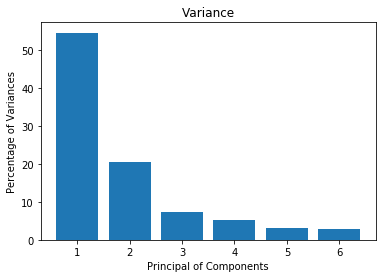

In [37]:
plt.bar(x, explained_variance*100)
plt.ylabel('Percentage of Variances')
plt.xlabel('Principal of Components')
plt.title ('Variance')
plt.show()

In [38]:
## second z scaling

z_pca_df = (pca_df-pca_df.mean())/pca_df.std()

z_pca_df.columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6']
z_pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,0.032383,-0.145470,-0.125823,0.024811,-0.207199,0.054391
1,5.759489,20.059561,10.976641,-3.337183,-2.569256,-3.095613
2,0.018226,0.094510,-0.090244,0.087561,0.051386,-0.136471
3,0.042037,-0.094059,-0.126849,-0.006115,-0.075288,0.004066
4,8.859474,-4.655318,-2.919147,-4.642028,-22.393202,10.106919


In [39]:
m1 = z_pca_df**2
m1['sum'] = m1.sum(axis = 1)
m1['s1'] = m1['sum']**(1/2)
m1['Record']=data['RECORD']
m1 = m1.sort_values('s1',ascending = True)
m1['Rank1']=[i for i in range(1,1070995)]
m1 = m1.sort_values('s1',ascending = False)
m1.head(10)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,sum,s1,Record,Rank1
632815,279869.327063,200166.481438,334646.979376,197879.898945,18095.478149,10184.889700,1.040843e+06,1020.217161,632816,1070994
565391,414100.168483,157533.705206,213507.921088,46466.079914,468.705415,28472.554310,8.605491e+05,927.657876,565392,1070993
1067359,17341.242110,363322.366725,272693.142146,28485.484453,59.943245,38084.356726,7.199865e+05,848.520203,1067360,1070992
917941,38032.075715,3872.989415,23752.836123,10130.171636,271538.857310,189735.793550,5.370627e+05,732.845634,917942,1070991
585117,25876.676219,12811.115562,565.876611,187772.027803,99647.927212,17576.744502,3.442504e+05,586.728530,585118,1070990
585438,17173.089019,9751.441294,30.021551,168130.453788,17200.616414,50580.746923,2.628664e+05,512.704953,585439,1070989
85885,27538.240569,9393.438950,2721.615274,7932.760070,140190.561487,27021.317309,2.147979e+05,463.462980,85886,1070988
67128,45877.262835,2169.931232,2120.866661,789.089551,134274.014243,163.408808,1.853946e+05,430.574701,67129,1070987
585119,16693.356981,8155.183895,849.214221,126287.203173,22040.312779,753.906785,1.747792e+05,418.065997,585120,1070986
565397,58368.528340,12892.555263,14581.901410,1253.676843,9196.202048,75157.410978,1.714503e+05,414.065544,565398,1070985


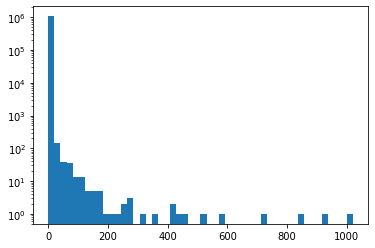

In [40]:
plt.hist(m1['s1'], bins = 50)
plt.yscale('log')
plt.show()

## Autoencoder

In [62]:
input_dim = z_pca_df.shape[1]
encoding_dim = 4
hidden_dim = 1
learning_rate = 1e-7
nb_epoch = 10
batch_size = 1024


input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [63]:
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
##checkpointer = ModelCheckpoint(filepath="model.h5",verbose=0,save_best_only=True)
##tensorboard = TensorBoard(log_dir='./logs',histogram_freq=0,write_graph=True,write_images=True)
history = autoencoder.fit(z_pca_df, z_pca_df,
                    epochs=nb_epoch,
                    shuffle=True,
                    verbose=1)
predictions = autoencoder.predict(z_pca_df)

Epoch 1/10
1070994/1070994 [==============================] - 101s 94us/step - loss: 0.9851 - accuracy: 0.6359
Epoch 2/10
1070994/1070994 [==============================] - 94s 88us/step - loss: 0.9808 - accuracy: 0.6857
Epoch 3/10
1070994/1070994 [==============================] - 92s 86us/step - loss: 0.9770 - accuracy: 0.6860
Epoch 4/10
1070994/1070994 [==============================] - 104s 97us/step - loss: 0.9717 - accuracy: 0.6739
Epoch 5/10
1070994/1070994 [==============================] - 106s 99us/step - loss: 0.9636 - accuracy: 0.3661
Epoch 6/10
1070994/1070994 [==============================] - 106s 99us/step - loss: 0.9598 - accuracy: 0.2866
Epoch 7/10
1070994/1070994 [==============================] - 105s 98us/step - loss: 0.9546 - accuracy: 0.2713
Epoch 8/10
1070994/1070994 [==============================] - 112s 105us/step - loss: 0.9504 - accuracy: 0.2646 - loss: 0.9
Epoch 9/10
1070994/1070994 [==============================] - 146s 136us/step - loss: 0.9480 - accura

In [64]:
prediction_df = pd.DataFrame(predictions)
prediction_df.columns = ['predPCA1','predPCA2','predPCA3','predPCA4','predPCA5','predPCA6']
prediction_df

,predPCA1,predPCA2,predPCA3,predPCA4,predPCA5,predPCA6
0,0.021207,0.000000,0.000000,0.0,0.0,0.0
1,11.821677,18.160906,9.847903,0.0,0.0,0.0
2,0.000000,0.026121,0.047355,0.0,0.0,0.0
3,0.023890,0.000000,0.000000,0.0,0.0,0.0
4,5.872708,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...
1070989,0.000000,0.000000,0.000000,0.0,0.0,0.0
1070990,0.000000,0.000000,0.000000,0.0,0.0,0.0
1070991,0.000000,0.000000,0.000000,0.0,0.0,0.0
1070992,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [65]:
from scipy.stats import binned_statistic

In [66]:
## Find the difference between original input records and output records
diff = pd.DataFrame()
for i in range(6):
    diff[i] = abs(z_pca_df.iloc[:,i] - prediction_df.iloc[:,i])
diff.columns = ['diff1','diff2','diff3','diff4','diff5','diff6']
diff.head()

,diff1,diff2,diff3,diff4,diff5,diff6
0,0.011175,0.145470,0.125823,0.024811,0.207199,0.054391
1,6.062188,1.898655,1.128738,3.337183,2.569256,3.095613
2,0.018226,0.068389,0.137599,0.087561,0.051386,0.136471
3,0.018147,0.094059,0.126849,0.006115,0.075288,0.004066
4,2.986766,4.655318,2.919147,4.642028,22.393202,10.106919


In [67]:
m2 = diff**2
m2['sum'] = m2.sum(axis = 1)
m2['s2'] = m2['sum']**(1/2)
m2['Record']=data['RECORD']
m2 = m2.sort_values('s2',ascending = True)
m2['Rank2']=[i for i in range(1,1070995)]
m2 = m2.sort_values('s2',ascending = False)
m2.head(10)

,diff1,diff2,diff3,diff4,diff5,diff6,sum,s2,Record,Rank2
632815,261100.423518,200166.481438,334646.979376,197879.898945,18095.478149,10184.889700,1.022074e+06,1010.976830,632816,1070994
565391,398701.408283,142926.056256,223091.357385,46466.079914,468.705415,28472.554310,8.401262e+05,916.583963,565392,1070993
1067359,14306.090602,340954.092077,262086.639421,28485.484453,59.943245,38084.356726,6.839766e+05,827.028782,1067360,1070992
917941,31318.817872,3872.989415,23752.836123,10130.171636,271538.857310,189735.793550,5.303495e+05,728.250964,917942,1070991
585117,20571.440631,12811.115562,565.876611,187772.027803,99647.927212,17576.744502,3.389451e+05,582.189945,585118,1070990
585438,12907.531741,9751.441294,30.021551,168130.453788,17200.616414,50580.746923,2.586008e+05,508.528084,585439,1070989
85885,21874.289222,9393.438950,2721.615274,7932.760070,140190.561487,27021.317309,2.091340e+05,457.311691,85886,1070988
67128,38472.027358,2169.931232,2120.866661,789.089551,134274.014243,163.408808,1.779893e+05,421.887826,67129,1070987
585119,12492.076930,8155.183895,849.214221,126287.203173,22040.312779,753.906785,1.705779e+05,413.010772,585120,1070986
565397,49974.105301,12892.555263,14581.901410,1253.676843,9196.202048,75157.410978,1.630559e+05,403.801748,565398,1070985


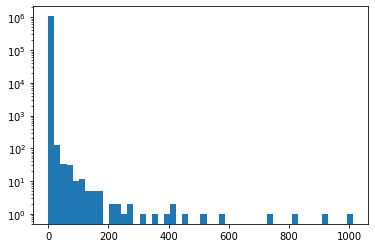

In [68]:
plt.hist(m2['s2'], bins = 50)
plt.yscale('log')
plt.show()

## Unneccesary Code

In [48]:
list1=pd.qcut(m1['s1'].rank(method='first'), 10000, labels=False)

In [49]:
list2=pd.qcut(m2['s2'].rank(method='first'), 10000, labels=False)

In [50]:
list1.head(10)

632815     9999
565391     9999
1067359    9999
917941     9999
585117     9999
585438     9999
85885      9999
67128      9999
585119     9999
565397     9999
Name: s1, dtype: int64

In [51]:
list2.head(10)

632815     9999
565391     9999
1067359    9999
917941     9999
585117     9999
585438     9999
85885      9999
67128      9999
585119     9999
565397     9999
Name: s2, dtype: int64

In [69]:
final=pd.merge(m1,m2,how='left',on='Record')

In [70]:
final.columns

Index(['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'sum_x', 's1', 'Record',
       'Rank1', 'diff1', 'diff2', 'diff3', 'diff4', 'diff5', 'diff6', 'sum_y',
       's2', 'Rank2'],
      dtype='object')

In [71]:
final=final[['Record','Rank1','Rank2']]

In [72]:
final['Weighted Rank']=final['Rank1']*0.5+final['Rank2']*0.5

In [73]:
final.sort_values('Weighted Rank', ascending=False)

,Record,Rank1,Rank2,Weighted Rank
0,632816,1070994,1070994,1070994.0
1,565392,1070993,1070993,1070993.0
2,1067360,1070992,1070992,1070992.0
3,917942,1070991,1070991,1070991.0
4,585118,1070990,1070990,1070990.0
...,...,...,...,...
1070988,946283,5,5,5.0
1070990,1039737,4,4,4.0
1070991,1040201,3,3,3.0
1070992,1044832,2,2,2.0


In [74]:
final.head(10)

,Record,Rank1,Rank2,Weighted Rank
0,632816,1070994,1070994,1070994.0
1,565392,1070993,1070993,1070993.0
2,1067360,1070992,1070992,1070992.0
3,917942,1070991,1070991,1070991.0
4,585118,1070990,1070990,1070990.0
5,585439,1070989,1070989,1070989.0
6,85886,1070988,1070988,1070988.0
7,67129,1070987,1070987,1070987.0
8,585120,1070986,1070986,1070986.0
9,565398,1070985,1070985,1070985.0


In [75]:
final=final[['Record','Weighted Rank']]

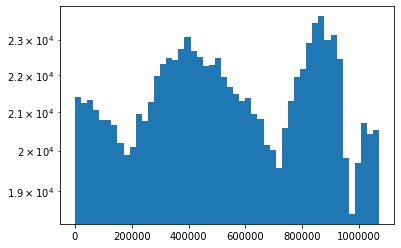

In [76]:
plt.hist(final['Weighted Rank'], bins = 50)
plt.yscale('log')
plt.show()

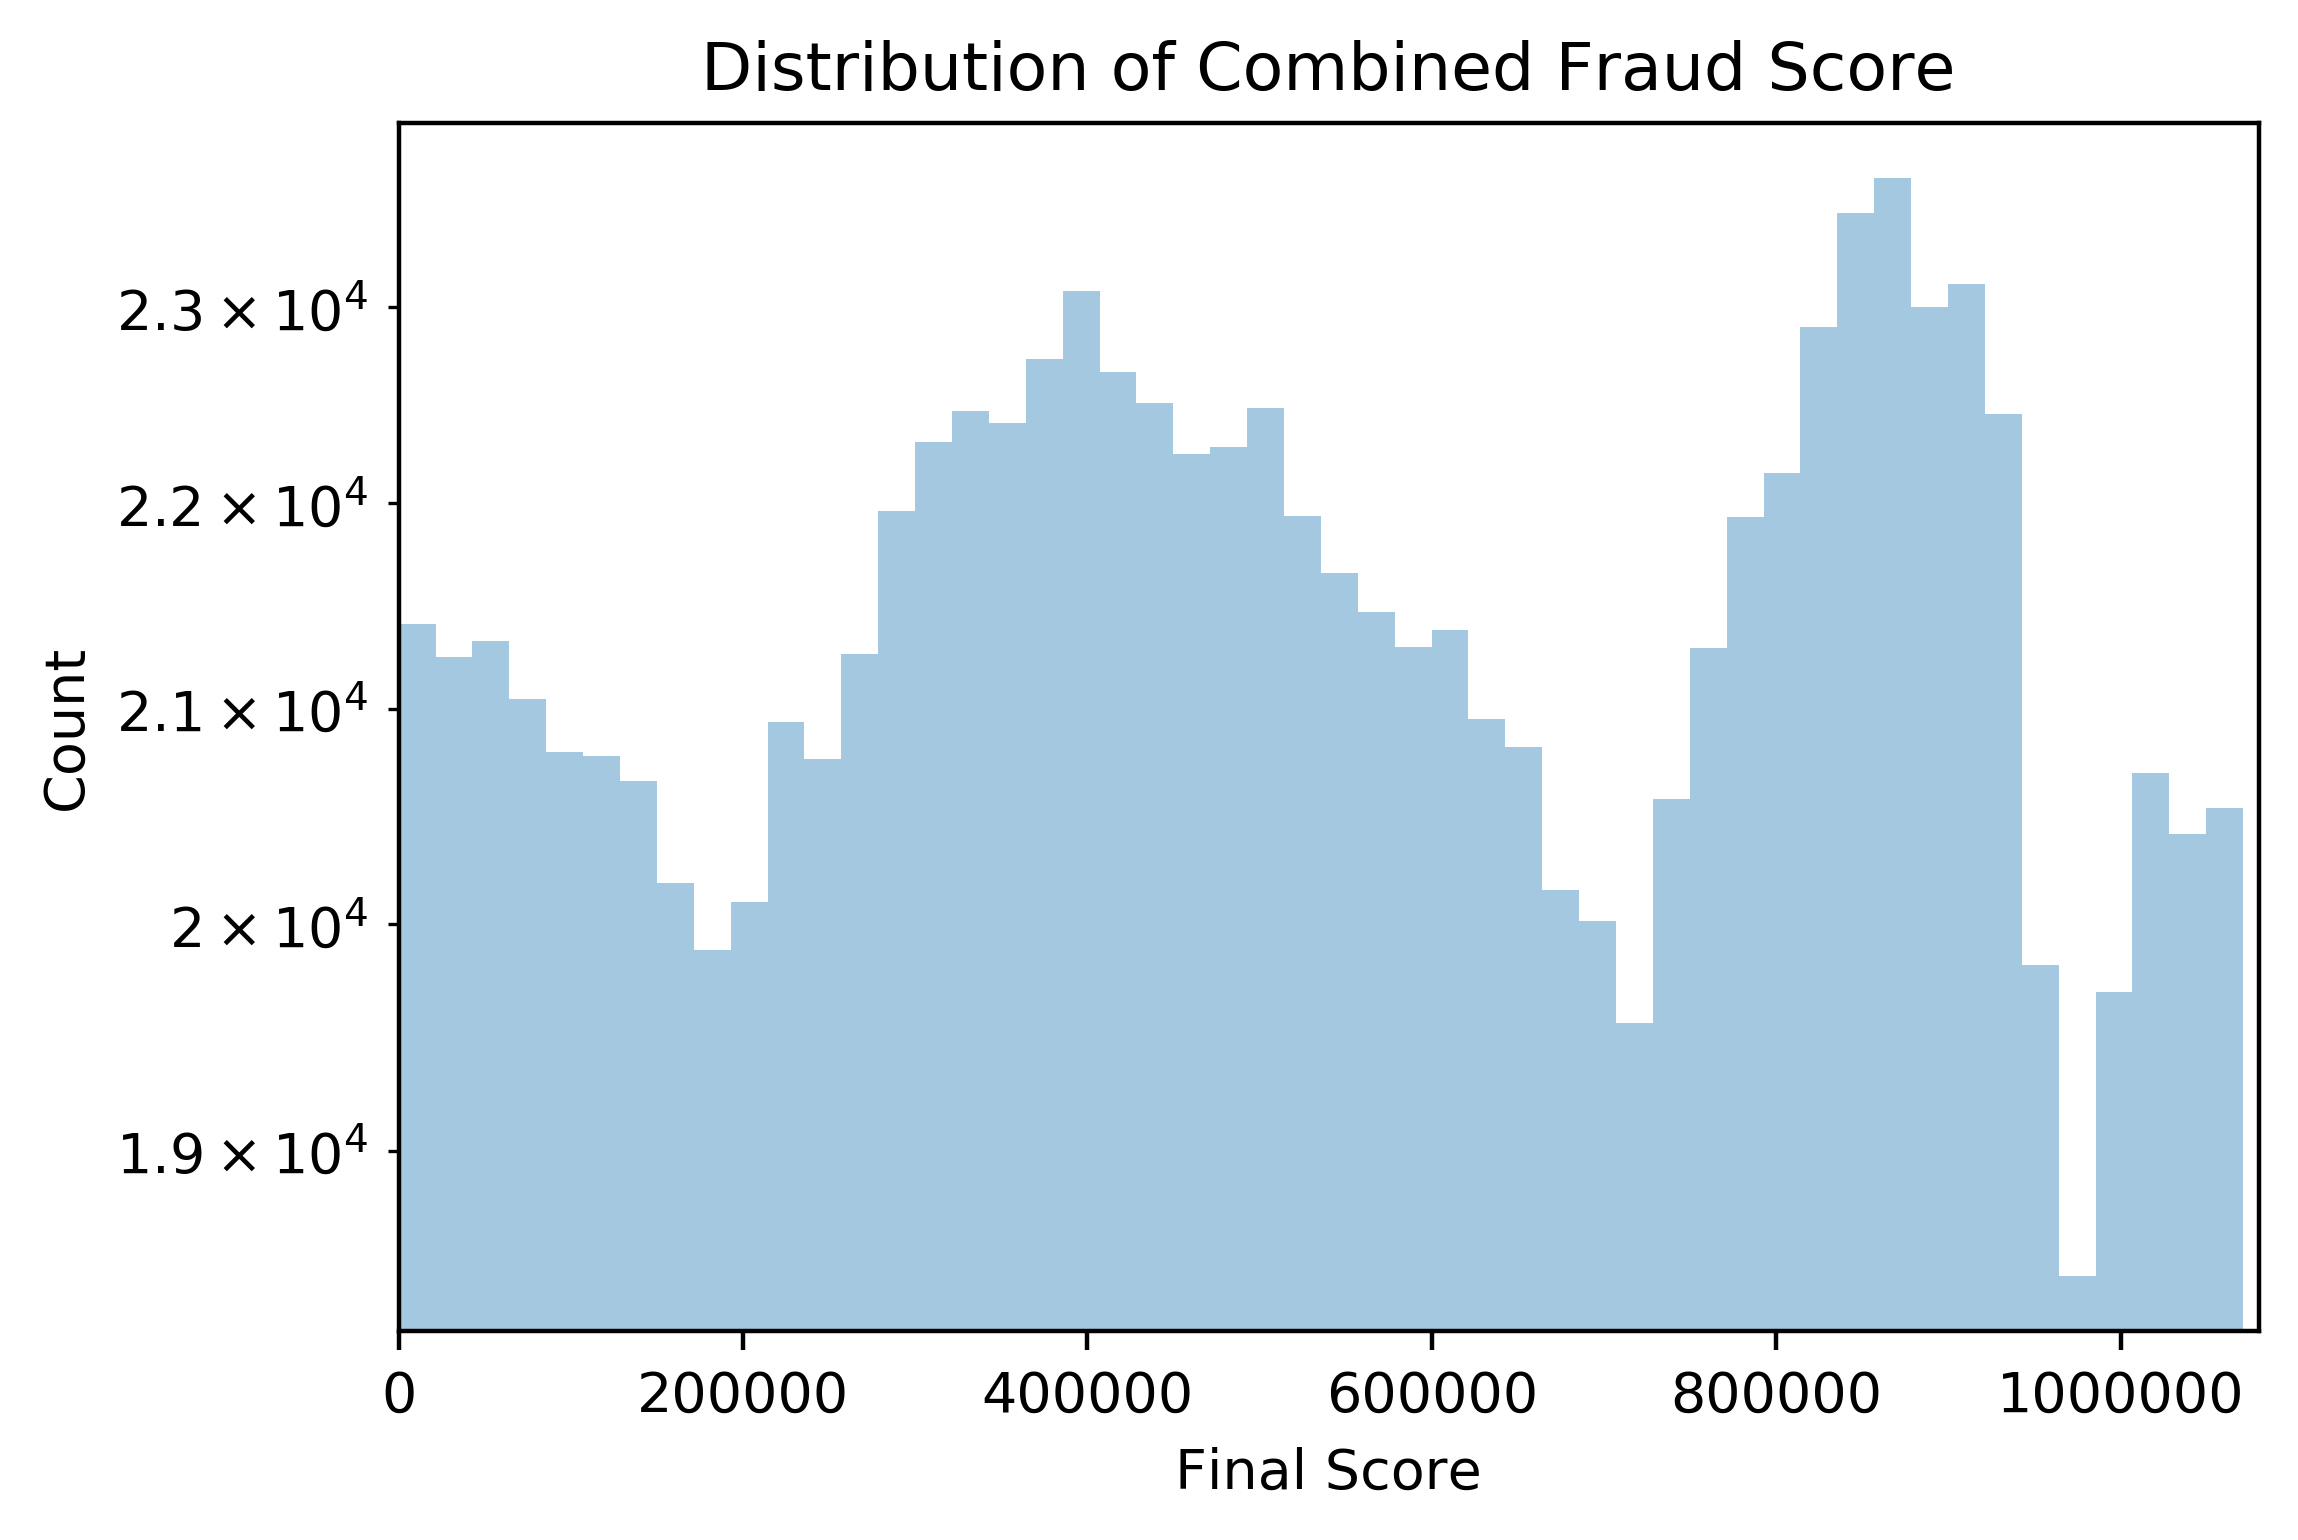

In [77]:
xhigh = 1080000
plt.figure(dpi = 400)
plt.yscale('log')
plt.xlim(0,xhigh)
temp = final[final['Weighted Rank'] <= xhigh]
sns.distplot(temp['Weighted Rank'], hist=True,kde = False)
plt.ylabel('Count')
plt.xlabel('Final Score')
plt.title('Distribution of Combined Fraud Score')
plt.savefig('finalscore.png')

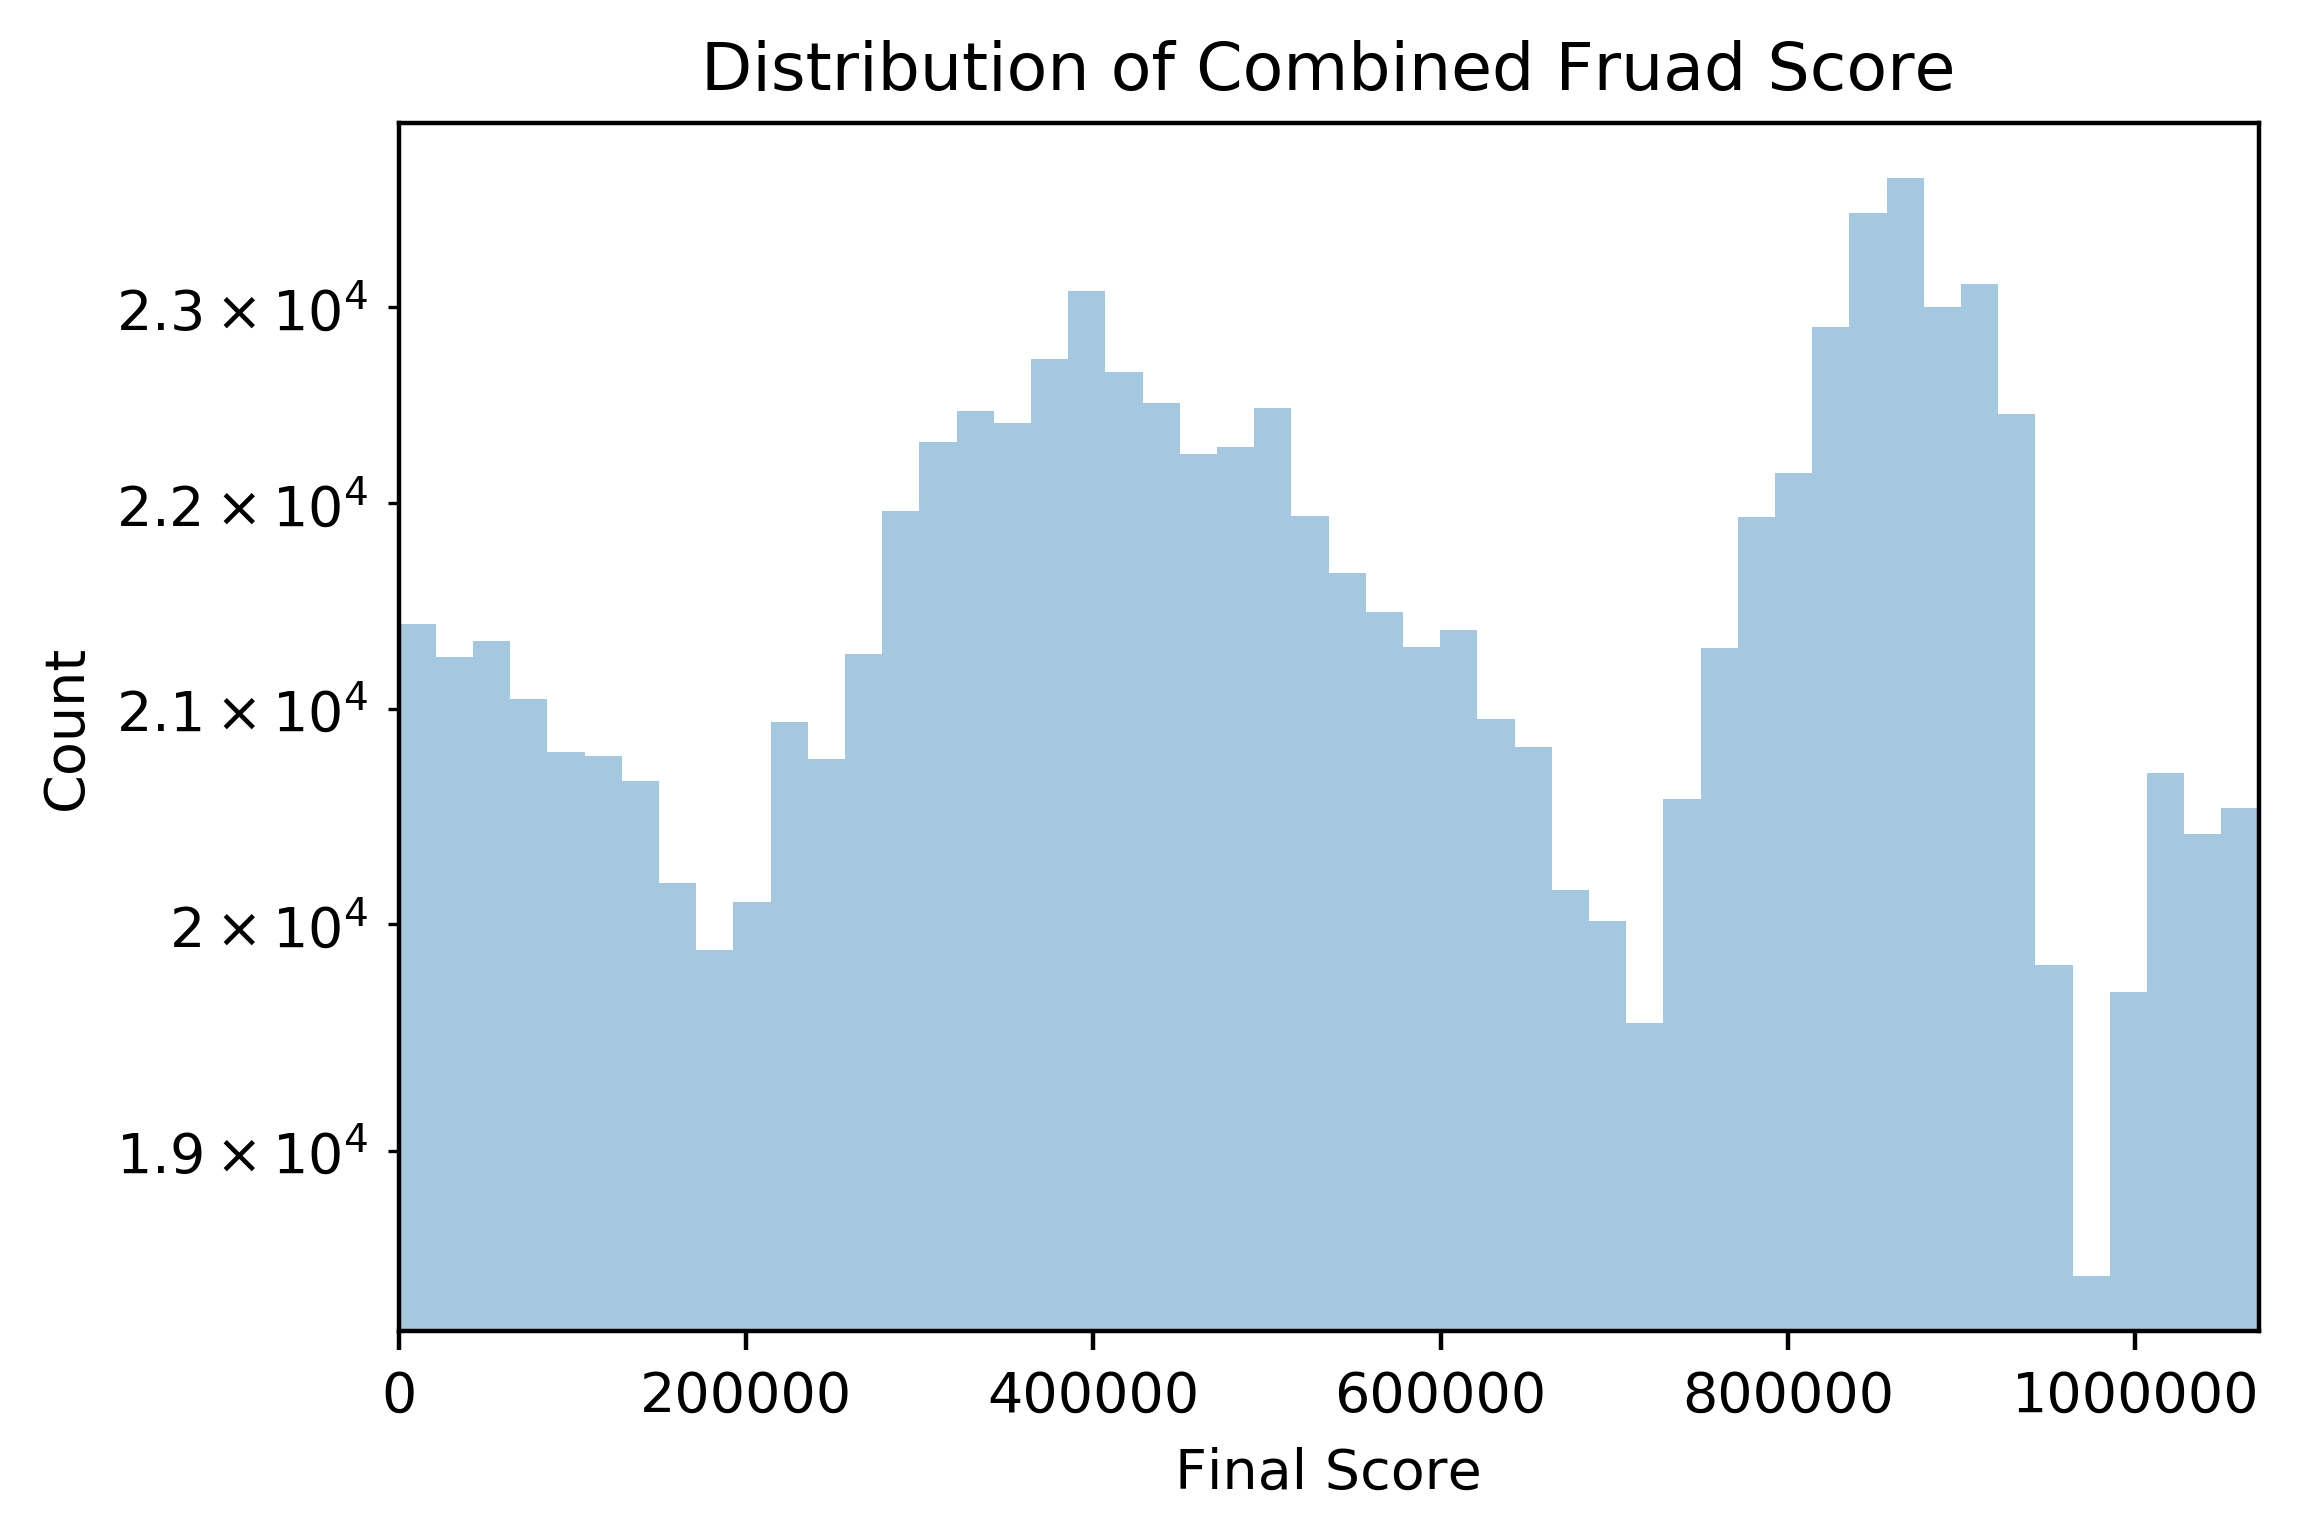

In [78]:
plt.figure(dpi = 400)
plt.yscale('log')
plt.xlim(0,1070995)
sns.distplot(final['Weighted Rank'], hist=True,kde = False)
plt.ylabel('Count')
plt.xlabel('Final Score')
plt.title('Distribution of Combined Fruad Score')
plt.show()